### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

### Loading Data

In [2]:
df = pd.read_csv(r'customer_shopping_data.csv')

### Data Preprocessing for EDA

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.shape

(99457, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [6]:
df.drop_duplicates()
df.shape

(99457, 10)

### Data Cleaning

In [7]:
# converting the 'invoice_date' column to datetime format
df['invoice_date']= pd.to_datetime(df['invoice_date'], format='mixed')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [8]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d%m%y')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [9]:
# dropping invoice and customer id column because it is not required
df.drop(['invoice_no', 'customer_id'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gender          99457 non-null  object        
 1   age             99457 non-null  int64         
 2   category        99457 non-null  object        
 3   quantity        99457 non-null  int64         
 4   price           99457 non-null  float64       
 5   payment_method  99457 non-null  object        
 6   invoice_date    99457 non-null  datetime64[ns]
 7   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.1+ MB


In [11]:
df.isnull().sum()

gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [13]:
df['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [14]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

### EDA

In [15]:
df[['price', 'age']].describe()

,price,age
count,99457.000000,99457.000000
mean,689.256321,43.427089
std,941.184567,14.990054
min,5.230000,18.000000
25%,45.450000,30.000000
50%,203.300000,43.000000
75%,1200.320000,56.000000
max,5250.000000,69.000000


### Who Shops the Most (Male / Female) ?

In [16]:
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

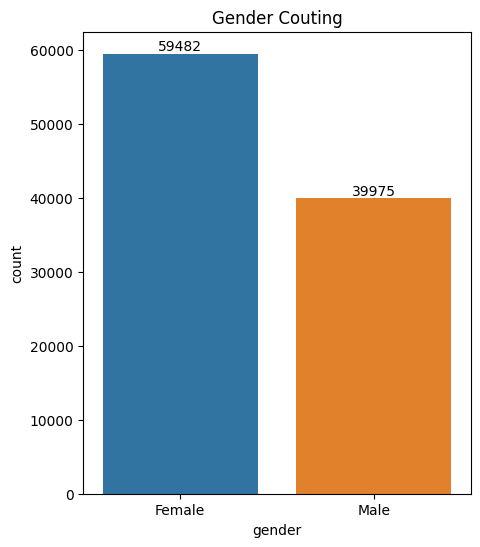

In [17]:
plt.figure(figsize = (5, 6))
ax = sns.countplot(x ='gender', data = df)
plt.title("Gender Couting")

for x in ax.containers:
    ax.bar_label(x)

In [18]:
genderwise_sales = df.groupby(df['gender'], as_index=False)['price'].sum().sort_values('price', ascending=False)
genderwise_sales

,gender,price
0,Female,40931801.62
1,Male,27619564.29


Text(0.5, 1.0, 'Gender vs Amount Spent')

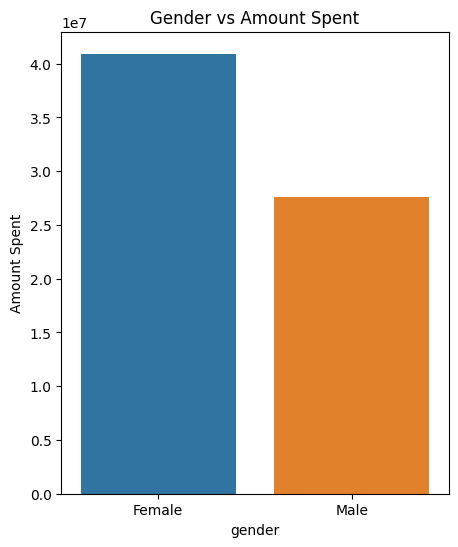

In [19]:
plt.figure(figsize = (5, 6))
sns.barplot(data=genderwise_sales, x='gender', y='price')
plt.ylabel("Amount Spent")
plt.title("Gender vs Amount Spent")

#### - From above graphs we can clearly conclude that most of the buyers were female and also the purchasing  power of females  are higher

#### as compared to male.

In [20]:
df.columns

Index(['gender', 'age', 'category', 'quantity', 'price', 'payment_method',
       'invoice_date', 'shopping_mall'],
      dtype='object')

<Axes: xlabel='age', ylabel='count'>

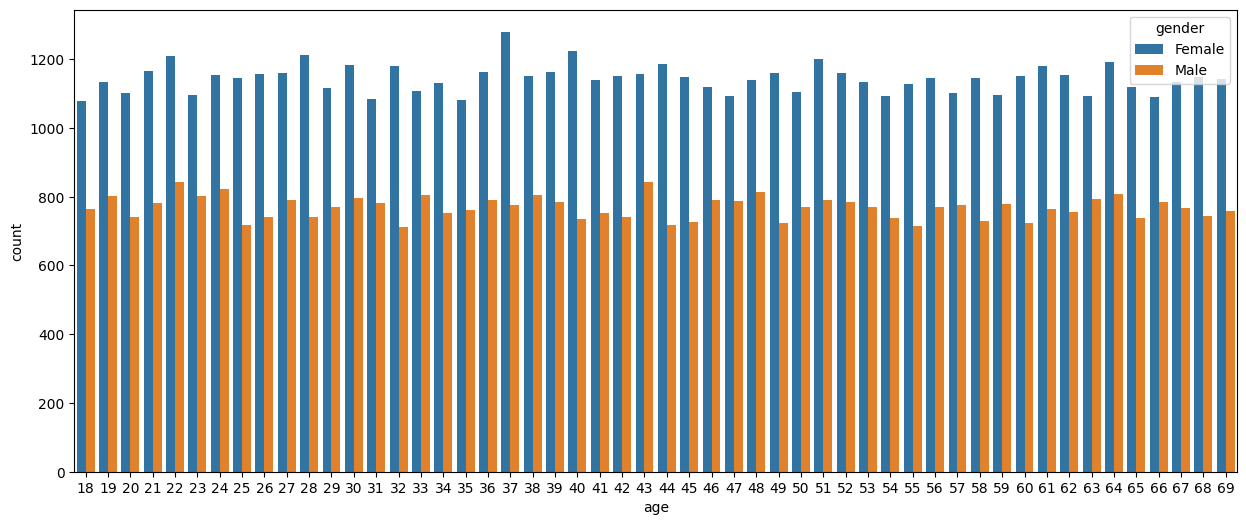

In [21]:
plt.figure(figsize =(15,6))
sns.countplot(data=df, x='age', hue='gender')

#### Problem - It's very hard to visualize using this graph, because there are many unique values in the age column causing cluster

#### solution - Dividing into different age group will help to compact the data and it will be easy to visualize

In [22]:
def age_group(value):
    if value <= 17:
        return '0-17'
    elif 18<=value<=25:
        return '18-25'
    elif 26<=value<=35:
        return '26-35' 
    elif 36<=value<=45:
        return '36-45'
    elif 46<=value<=55:
        return '46-55'
    else:
        return '55+'
    
df['age'] = df['age'].apply(age_group)
df.head()
        

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,26-35,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,18-25,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,18-25,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,Female,55+,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,Female,46-55,Books,4,60.60,Cash,2021-10-24,Kanyon


In [23]:
# renaming column age to age_group

df.rename(columns = {'age':'age_group'}, inplace=True)

Text(0.5, 1.0, 'Buyers Age Group')

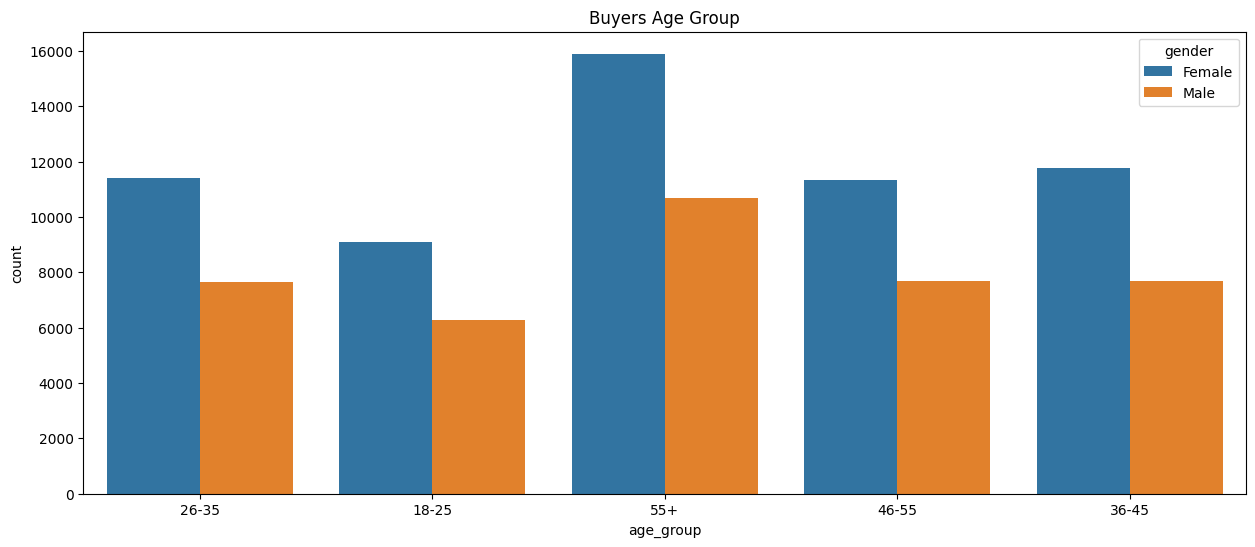

In [24]:
plt.figure(figsize =(15,6))
sns.countplot(data=df, x='age_group', hue='gender')
plt.title("Buyers Age Group")

#### - So, now we can easily conclude that most of the buyers are from 25+ age group and mostly female buyers are more  as compared to male.



In [25]:
df.head()

,gender,age_group,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,26-35,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,18-25,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,18-25,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,Female,55+,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,Female,46-55,Books,4,60.60,Cash,2021-10-24,Kanyon


## Sales distribution

###  - Total sales by Shopping Malls

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Kanyon'),
  Text(1, 0, 'Forum Istanbul'),
  Text(2, 0, 'Metrocity'),
  Text(3, 0, 'Metropol AVM'),
  Text(4, 0, 'Istinye Park'),
  Text(5, 0, 'Mall of Istanbul'),
  Text(6, 0, 'Emaar Square Mall'),
  Text(7, 0, 'Cevahir AVM'),
  Text(8, 0, 'Viaport Outlet'),
  Text(9, 0, 'Zorlu Center')])

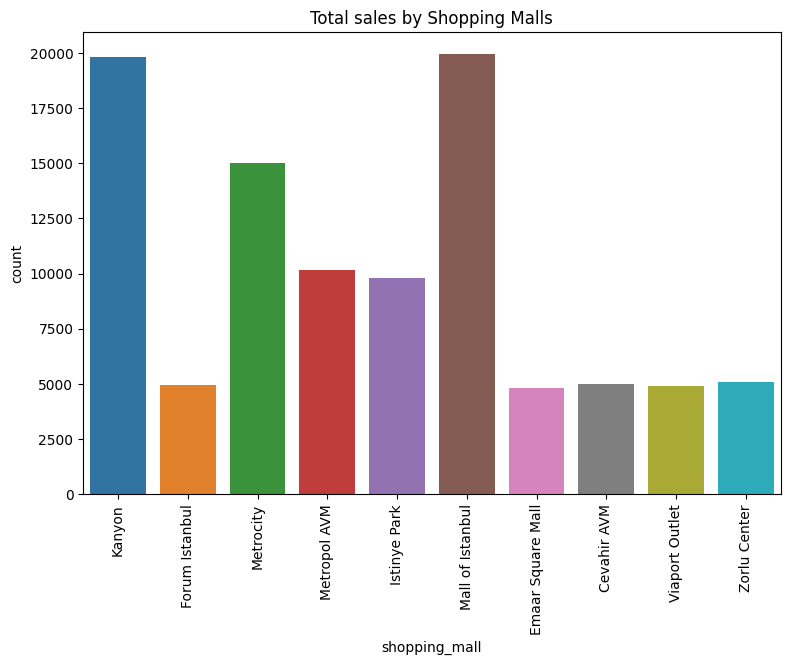

In [26]:
plt.figure(figsize = (9, 6))
sns.countplot(data=df, x=df['shopping_mall'])
plt.title('Total sales by Shopping Malls')
plt.xticks(rotation = 90)

### Quantity Wise Sales Distribution

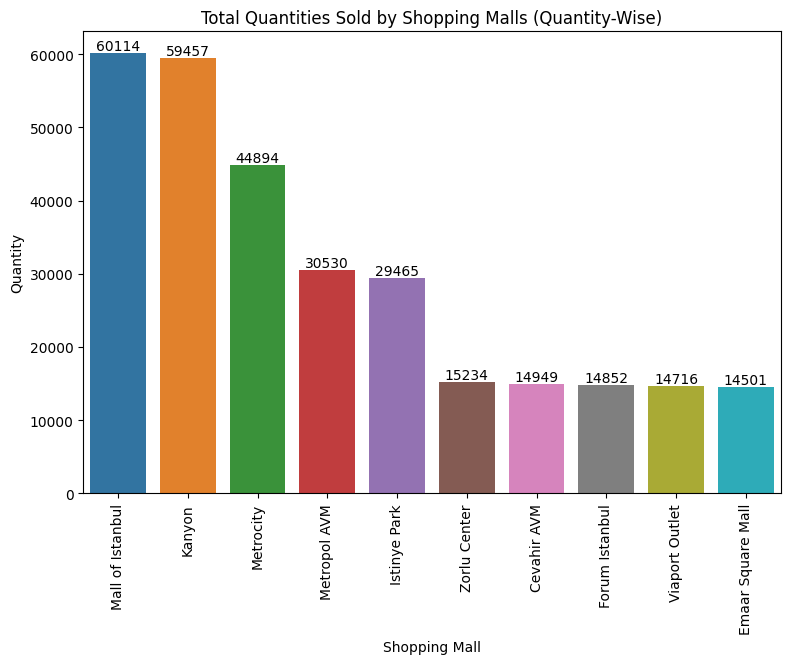

In [27]:
plt.figure(figsize=(9,6))
sbm = df.groupby(['shopping_mall'], as_index=False)['quantity'].sum().sort_values(by='quantity',ascending=False)
ax = sns.barplot(data=sbm, x='shopping_mall', y='quantity')
plt.ylabel('Quantity')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=90)
plt.title('Total Quantities Sold by Shopping Malls (Quantity-Wise)')

for x in ax.containers:
    ax.bar_label(x)
    
plt.show()

### Highest Selling Categories !

In [28]:
df.head(3)

,gender,age_group,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,26-35,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,18-25,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,18-25,Clothing,1,300.08,Cash,2021-09-11,Metrocity


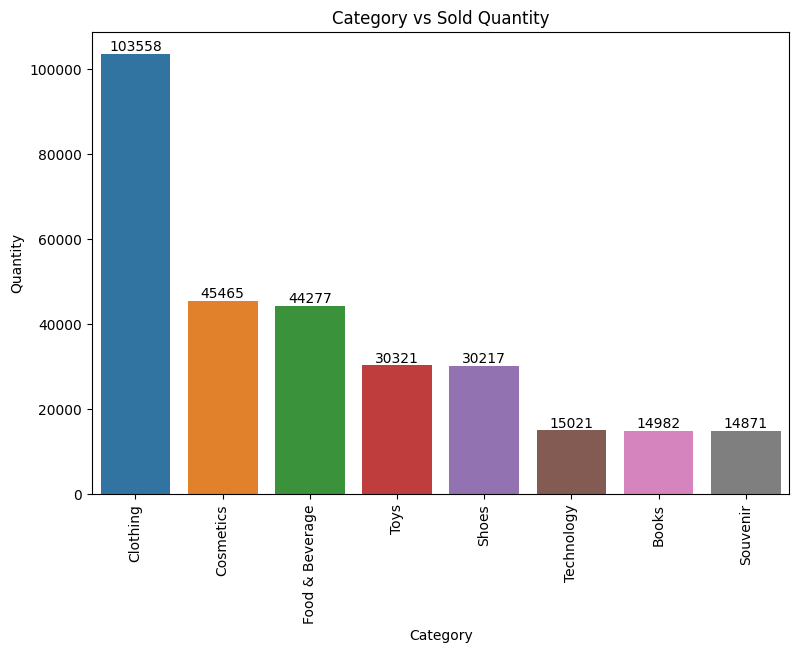

In [29]:
plt.figure(figsize=(9,6))
sbc = df.groupby(['category'], as_index=False)['quantity'].sum().sort_values('quantity', ascending=False)
ax = sns.barplot(data = sbc, x='category', y='quantity')
plt.ylabel('Quantity')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.title('Category vs Sold Quantity')


for x in ax.containers:
    ax.bar_label(x)
    
plt.show()

#### - It can be clearly observed that the highest selling category is Clothing 
#### - Second most selling categories are Cosmetics and foods, beverages

### Category vs Gender

Text(0.5, 1.0, 'Category vs Gender')

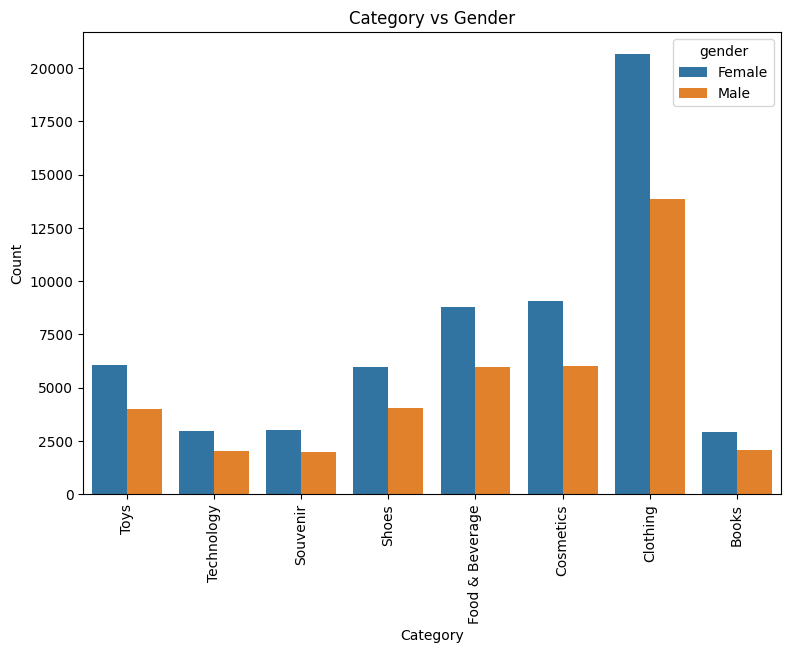

In [30]:
plt.figure(figsize=(9,6))
CVG = df.groupby(['gender'], as_index=False)["category"].value_counts().sort_values('category', ascending=False)
sns.barplot(data = CVG, x='category', y='count', hue='gender')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.title('Category vs Gender')    

#### Both male and female prefers buying clothes, food or cosmetcs more over other categories and again female buyers are more as compared to male

### Revenue Generated by Malls

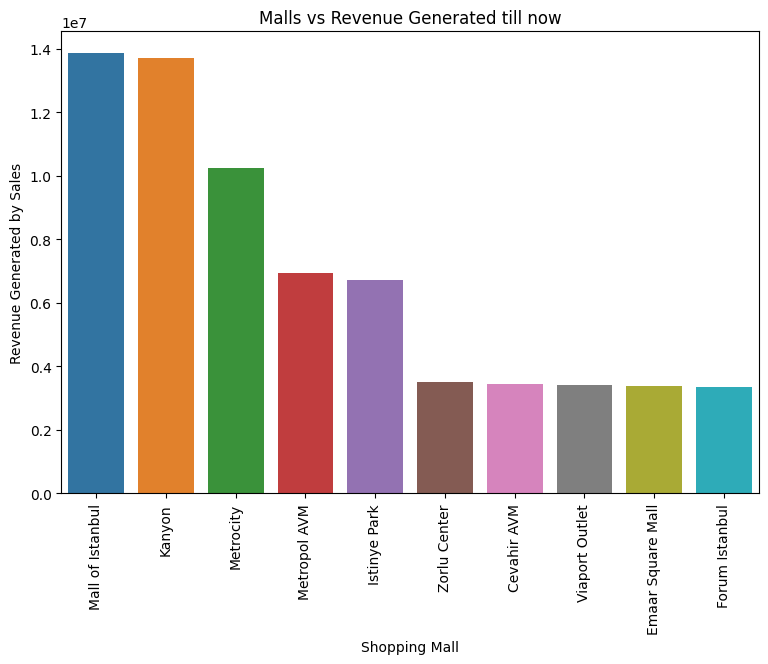

In [31]:
plt.figure(figsize=(9,6))
rbm = df.groupby(['shopping_mall'], as_index=False)['price'].sum().sort_values('price', ascending=False)
sns.barplot(data = rbm, x='shopping_mall', y='price')
plt.ylabel('Revenue Generated by Sales')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=90)
plt.title('Malls vs Revenue Generated till now')    
plt.show()

In [32]:
df.head()

,gender,age_group,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,26-35,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,18-25,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,18-25,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,Female,55+,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,Female,46-55,Books,4,60.60,Cash,2021-10-24,Kanyon


### Total Revenue Generated by different categories

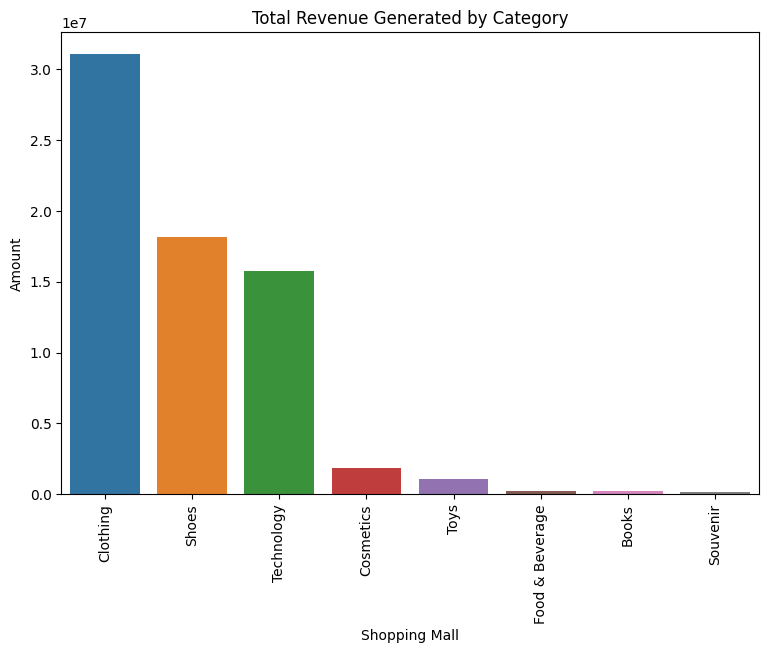

In [33]:
plt.figure(figsize=(9,6))
rbc = df.groupby(['category'], as_index=False)['price'].sum().sort_values('price', ascending=False)
sns.barplot(data = rbc, x='category', y='price')
plt.ylabel('Amount')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=90)
plt.title('Total Revenue Generated by Category')    
plt.show()

### Payment Mode Distribution

In [34]:
df.columns

Index(['gender', 'age_group', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

╒════╤══════════════════╤═════════╕
│    │ payment_method   │   count │
╞════╪══════════════════╪═════════╡
│  0 │ Cash             │   44447 │
├────┼──────────────────┼─────────┤
│  1 │ Credit Card      │   34931 │
├────┼──────────────────┼─────────┤
│  2 │ Debit Card       │   20079 │
╘════╧══════════════════╧═════════╛


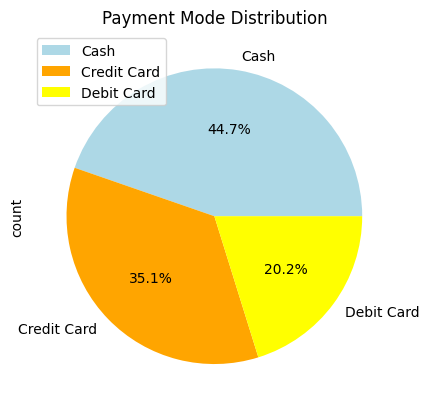

In [35]:
paymode = df['payment_method'].value_counts() 

# Creating a sample DataFrame
temp = {'payment_method': paymode.index,'count':paymode.values}
dataf = pd.DataFrame(temp)

# Plotting the DataFrame as a table   
print(tabulate(dataf, headers = 'keys', tablefmt = 'fancy_grid'))
  
# plotting data on chart
dataf.plot(kind='pie', y='count', labels=dataf['payment_method'], colors=["lightblue","orange","yellow"] ,autopct='%1.1f%%')
plt.title('Payment Mode Distribution')
# displaying chart
plt.show()


In [36]:
df.head(3)

,gender,age_group,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,26-35,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,Male,18-25,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,Male,18-25,Clothing,1,300.08,Cash,2021-09-11,Metrocity


### Shopping Mall vs Payment Mode

In [37]:
test = df.groupby(['shopping_mall', 'payment_method'], as_index=False)['payment_method'].value_counts().sort_values('count', ascending=False)
pd.pivot_table(test,
    values=None,
    index=['shopping_mall'],
    columns=['payment_method'],
    aggfunc= np.sum,
    fill_value=0)


count                       
payment_method     Cash Credit Card Debit Card
shopping_mall                                 
Cevahir AVM        2228        1779        984
Emaar Square Mall  2114        1696       1001
Forum Istanbul     2183        1750       1014
Istinye Park       4436        3422       1923
Kanyon             8853        6916       4054
Mall of Istanbul   8894        7019       4030
Metrocity          6625        5347       3039
Metropol AVM       4559        3521       2081
Viaport Outlet     2231        1721        962
Zorlu Center       2324        1760        991

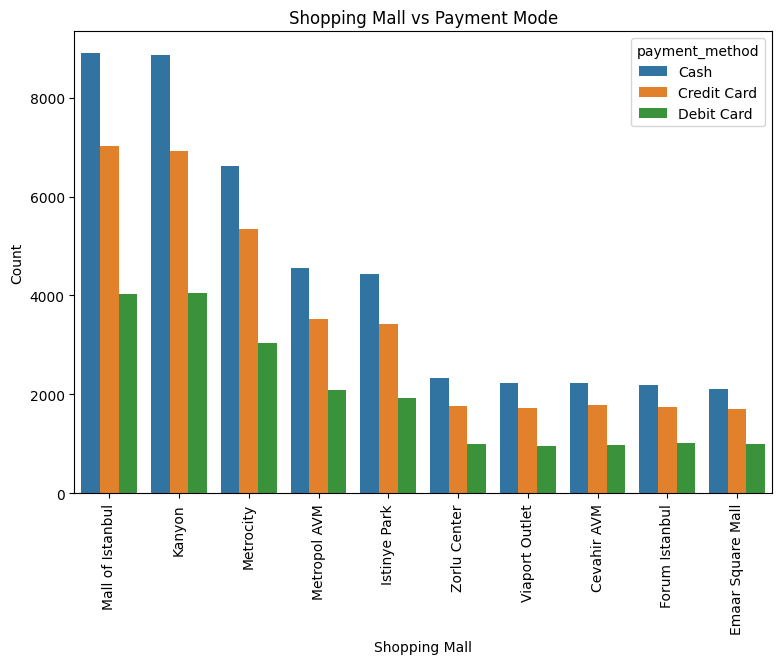

In [38]:
pmbm = df.groupby(['shopping_mall'], as_index = False)['payment_method'].value_counts().sort_values('count', ascending=False)
plt.figure(figsize=(9,6))
sns.barplot(data = pmbm, x='shopping_mall', y='count', hue='payment_method')
plt.ylabel('Count')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=90)
plt.title('Shopping Mall vs Payment Mode')    
plt.show()